# Install dependencies

In [1]:
from datetime import datetime, timedelta, timezone
import pandas as pd
import numpy as np
import requests
import os

## Variables

In [2]:
current_storage = os.path.join("d:", "data")
vn30f_storage = os.path.join(current_storage, 'vn30f')

start_time = 0
now_time = 9999999999
symbol = 'VN30F1M'

## Formulas

In [3]:
def split_data(data):
    """
    Hàm này chia dữ liệu thành 2 phần: tập huấn luyện và tập hold out.

    Args:
    data (pandas.DataFrame): DataFrame chứa dữ liệu cần chia.

    Returns:
    pandas.DataFrame: DataFrame chứa dữ liệu tập huấn luyện.
    pandas.DataFrame: DataFrame chứa dữ liệu tập giữ lại.
    """
    # Chia dữ liệu thành 3 phần
    new_part = np.array_split(data, 3)

    # Access each part individually
    hold_out = new_part[2]
    train_data = pd.concat([new_part[0], new_part[1]], axis=0)

    return train_data, hold_out

## Get data

In [4]:
def get_vn30f(start_time, now_time, symbol):
    def vn30f():
            return requests.get(f"https://services.entrade.com.vn/chart-api/chart?from={start_time}&resolution=1&symbol={symbol}&to={now_time}").json()
    vn30fm = pd.DataFrame(vn30f()).iloc[:,:6]
    vn30fm['t'] = vn30fm['t'].astype(int).apply(lambda x: datetime.utcfromtimestamp(x) + timedelta(hours = 7))
    vn30fm.columns = ['Date','Open','High','Low','Close','Volume']
    ohlc_dict = {                                                                                                             
        'Open': 'first',                                                                                                    
        'High': 'max',                                                                                                       
        'Low': 'min',                                                         
        'Close': 'last',                                                                                                    
        'Volume': 'sum',}
    vn30fm = pd.DataFrame(vn30f()).iloc[:,:6]
    vn30fm['t'] = vn30fm['t'].astype(int).apply(lambda x: datetime.utcfromtimestamp(x) + timedelta(hours = 7))
    vn30fm.columns = ['Date','Open','High','Low','Close','Volume']
    dt_object = datetime.utcfromtimestamp(start_time) + timedelta(hours = 7)
    now_object = datetime.utcfromtimestamp(now_time) + timedelta(hours = 7)

    print(f'===> Data {symbol} from {dt_object} to {now_object} has been appended ')
    
    return vn30fm

In [5]:
df = get_vn30f(start_time, now_time, symbol)

===> Data VN30F1M from 1970-01-01 07:00:00 to 2286-11-21 00:46:39 has been appended 


## EDA

In [6]:
from pandas import Series,DataFrame
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-08-13 09:00:00,943.5,943.5,942.9,942.9,975
1,2018-08-13 09:01:00,943.0,943.1,942.9,943.1,220
2,2018-08-13 09:02:00,943.0,943.6,943.0,943.5,121
3,2018-08-13 09:03:00,943.3,943.4,943.3,943.4,135
4,2018-08-13 09:04:00,943.2,943.2,943.0,943.1,361


In [8]:
df.describe(exclude=['datetime'])

,Open,High,Low,Close,Volume
count,318839.000000,318839.000000,318839.000000,318839.000000,318839.000000
mean,1091.805325,1092.167728,1091.443346,1091.805291,775.237621
std,244.571166,244.653298,244.487368,244.569480,1032.053394
min,563.000000,566.000000,560.100000,565.000000,1.000000
25%,884.500000,884.600000,884.300000,884.500000,276.000000
50%,1044.900000,1045.300000,1044.400000,1044.900000,531.000000
75%,1270.800000,1271.300000,1270.400000,1270.800000,962.000000
max,1576.600000,1576.900000,1575.800000,1576.700000,158907.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318839 entries, 0 to 318838
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    318839 non-null  datetime64[ns]
 1   Open    318839 non-null  float64       
 2   High    318839 non-null  float64       
 3   Low     318839 non-null  float64       
 4   Close   318839 non-null  float64       
 5   Volume  318839 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 14.6 MB


In [10]:
sub_df = df.copy()
sub_df.set_index('Date', inplace=True)

In [11]:
sub_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.5,942.9,942.9,975
2018-08-13 09:01:00,943.0,943.1,942.9,943.1,220
2018-08-13 09:02:00,943.0,943.6,943.0,943.5,121
2018-08-13 09:03:00,943.3,943.4,943.3,943.4,135
2018-08-13 09:04:00,943.2,943.2,943.0,943.1,361


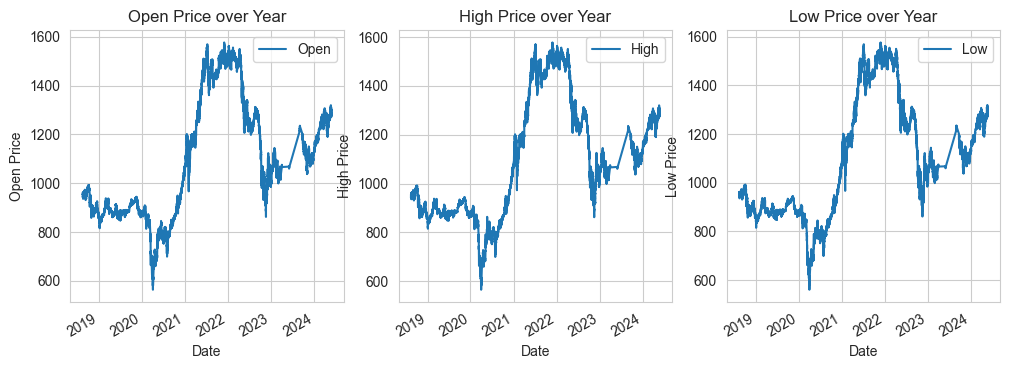

In [24]:
columns = ['Open', 'High', 'Low']
# Tạo các subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, column in enumerate(columns):
    if i < len(axs):  # Kiểm tra xem chỉ vẽ đồ thị nếu vẫn còn subplot
        sub_df[column].plot(ax=axs[i], legend=True)

        axs[i].set_title(f'{column} Price over Year')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(f'{column} Price')

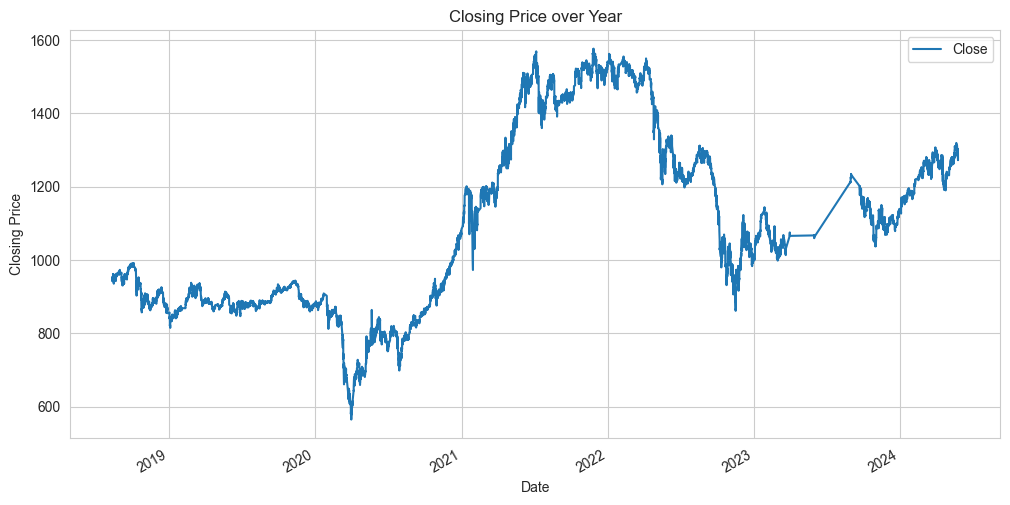

In [13]:
sub_df['Close'].plot(legend=True, figsize = (12, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price over Year')
plt.show()

Biểu đồ 1: Giá Đóng Cửa Theo Năm
Xu hướng tổng quan:
Giá đóng cửa duy trì ổn định trong năm 2019 và đầu năm 2020, dao động trong khoảng 700 đến 1000.
Từ giữa năm 2020 đến giữa năm 2021, giá tăng mạnh và đạt đỉnh khoảng 1600, phản ánh sự phục hồi kinh tế sau khủng hoảng.
Sau khi đạt đỉnh, giá giảm mạnh trong năm 2021 và đầu năm 2022, dao động quanh mức 1000 đến 1200, có thể do các yếu tố rủi ro thị trường và lạm phát.
Từ giữa năm 2022 đến năm 2024, giá chứng khoán phục hồi và tăng dần, thể hiện xu hướng tăng trưởng tích cực và ổn định hơn.

In [30]:
sub_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.5,942.9,942.9,975
2018-08-13 09:01:00,943.0,943.1,942.9,943.1,220
2018-08-13 09:02:00,943.0,943.6,943.0,943.5,121
2018-08-13 09:03:00,943.3,943.4,943.3,943.4,135
2018-08-13 09:04:00,943.2,943.2,943.0,943.1,361


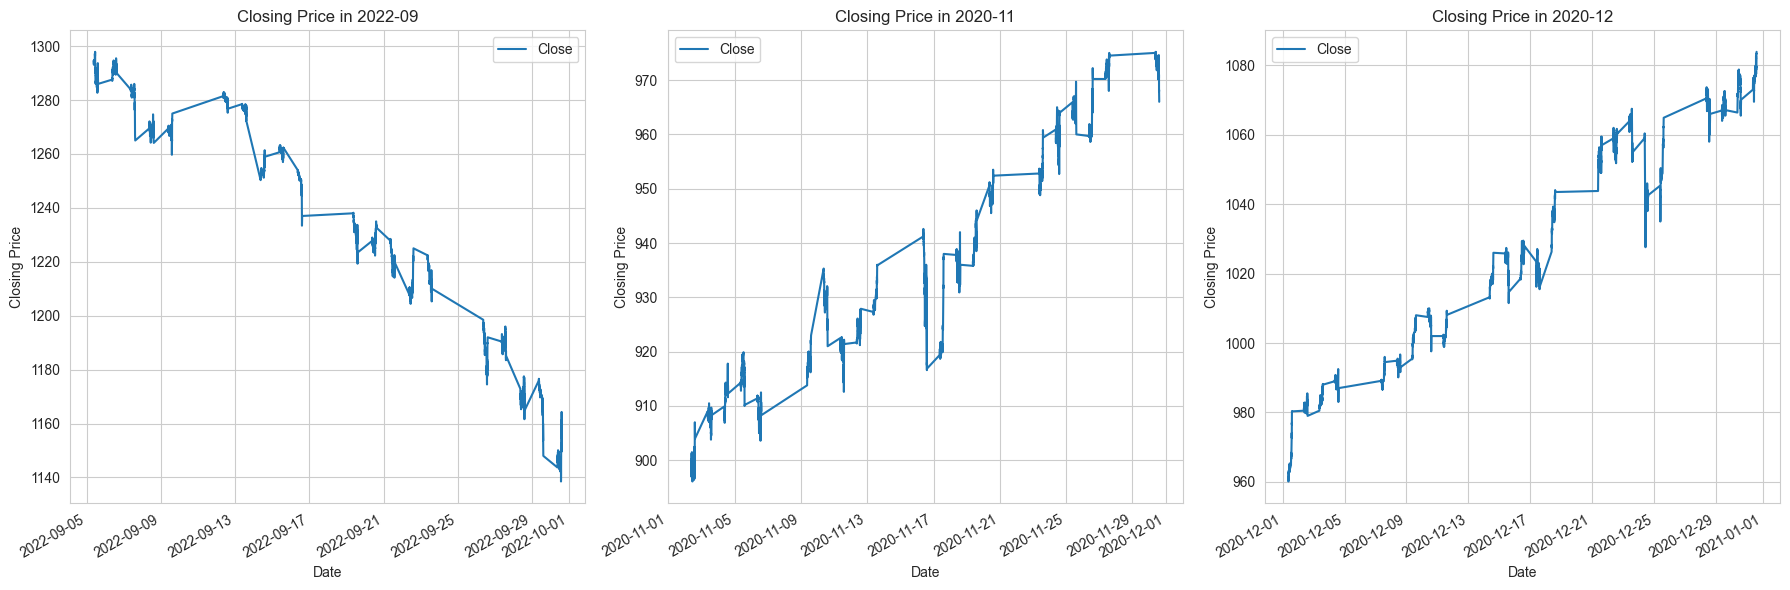

In [32]:
# Lấy ngẫu nhiên 3 khoảng thời gian, mỗi khoảng kéo dài một tháng
def get_random_months(data, num_months=3):
    # Lấy danh sách các tháng có trong dữ liệu
    months = data.index.to_period('M').unique()
    # Chọn ngẫu nhiên các tháng
    selected_months = random.sample(list(months), num_months)
    return selected_months

# Hàm để lấy dữ liệu trong khoảng thời gian một tháng
def get_data_for_month(data, month):
    return data[data.index.to_period('M') == month]

# Lấy 3 tháng ngẫu nhiên
selected_months = get_random_months(sub_df)

# Tạo các subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ dữ liệu cho mỗi tháng ngẫu nhiên
for i, month in enumerate(selected_months):
    month_data = get_data_for_month(sub_df, month)
    month_data['Close'].plot(ax=axs[i], legend=True)
    axs[i].set_title(f'Closing Price in {month}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Closing Price')

plt.tight_layout()
plt.show()

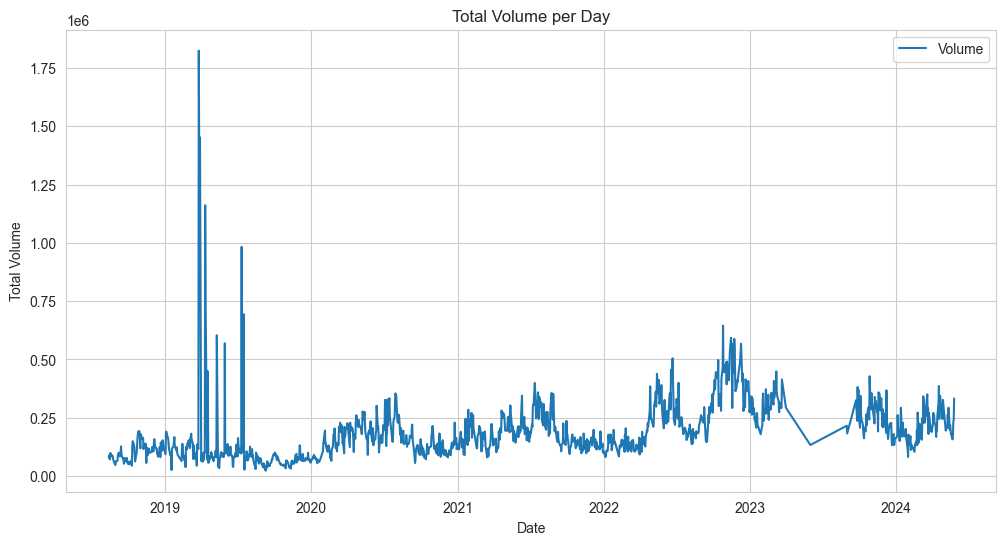

In [14]:
daily_sum = sub_df['Volume'].groupby(sub_df.index.date).sum()

daily_sum.plot(legend=True, figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.title('Total Volume per Day')
plt.show()

Xu hướng tổng quan:
Khối lượng giao dịch cao trong năm 2019, có một số đỉnh điểm lên đến 1.75 triệu đơn vị, có thể do sự kiện quan trọng hoặc biến động lớn trên thị trường.
Khối lượng giao dịch giảm đáng kể từ năm 2020 đến 2021, duy trì ở mức trung bình khoảng 0.25 triệu đơn vị, có thể do lo ngại từ đại dịch Covid-19 và giảm hứng thú đầu tư.
Từ năm 2022 đến 2024, khối lượng giao dịch có xu hướng tăng trở lại nhưng vẫn duy trì ở mức trung bình khoảng 0.25 triệu đơn vị, cho thấy sự ổn định hơn trong giao dịch.

Tổng quan:
Giá chứng khoán và khối lượng giao dịch có mối liên hệ chặt chẽ:
Khi giá chứng khoán tăng mạnh trong giai đoạn 2020-2021, khối lượng giao dịch không tăng tương ứng, cho thấy sự thận trọng từ phía nhà đầu tư.
Khối lượng giao dịch cao trong năm 2019 có thể là dấu hiệu của những sự kiện hoặc biến động lớn, mặc dù giá chứng khoán không thay đổi quá nhiều.

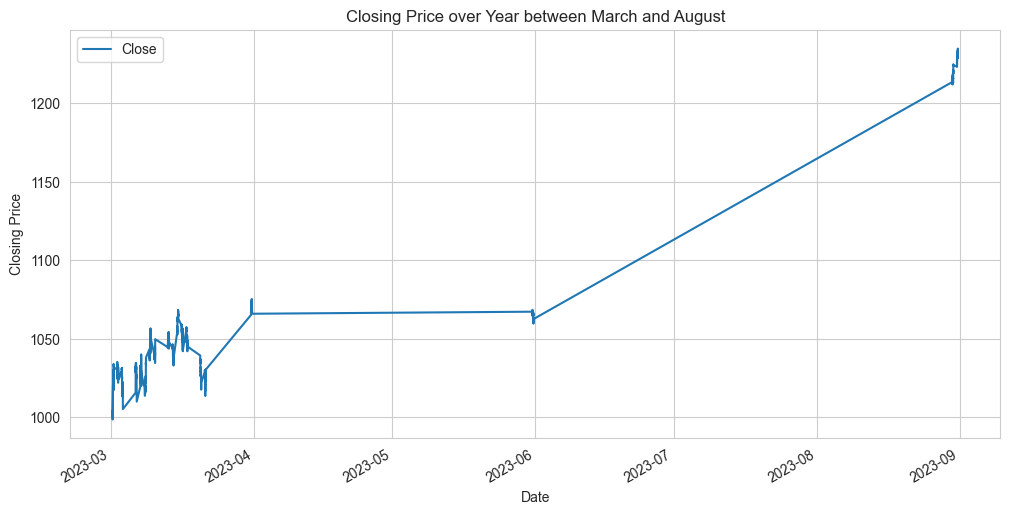

In [15]:
filtered_df = sub_df.loc['03-2023':'08-2023']
filtered_df['Close'].plot(legend=True, figsize = (12, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price over Year between March and August')
plt.show()

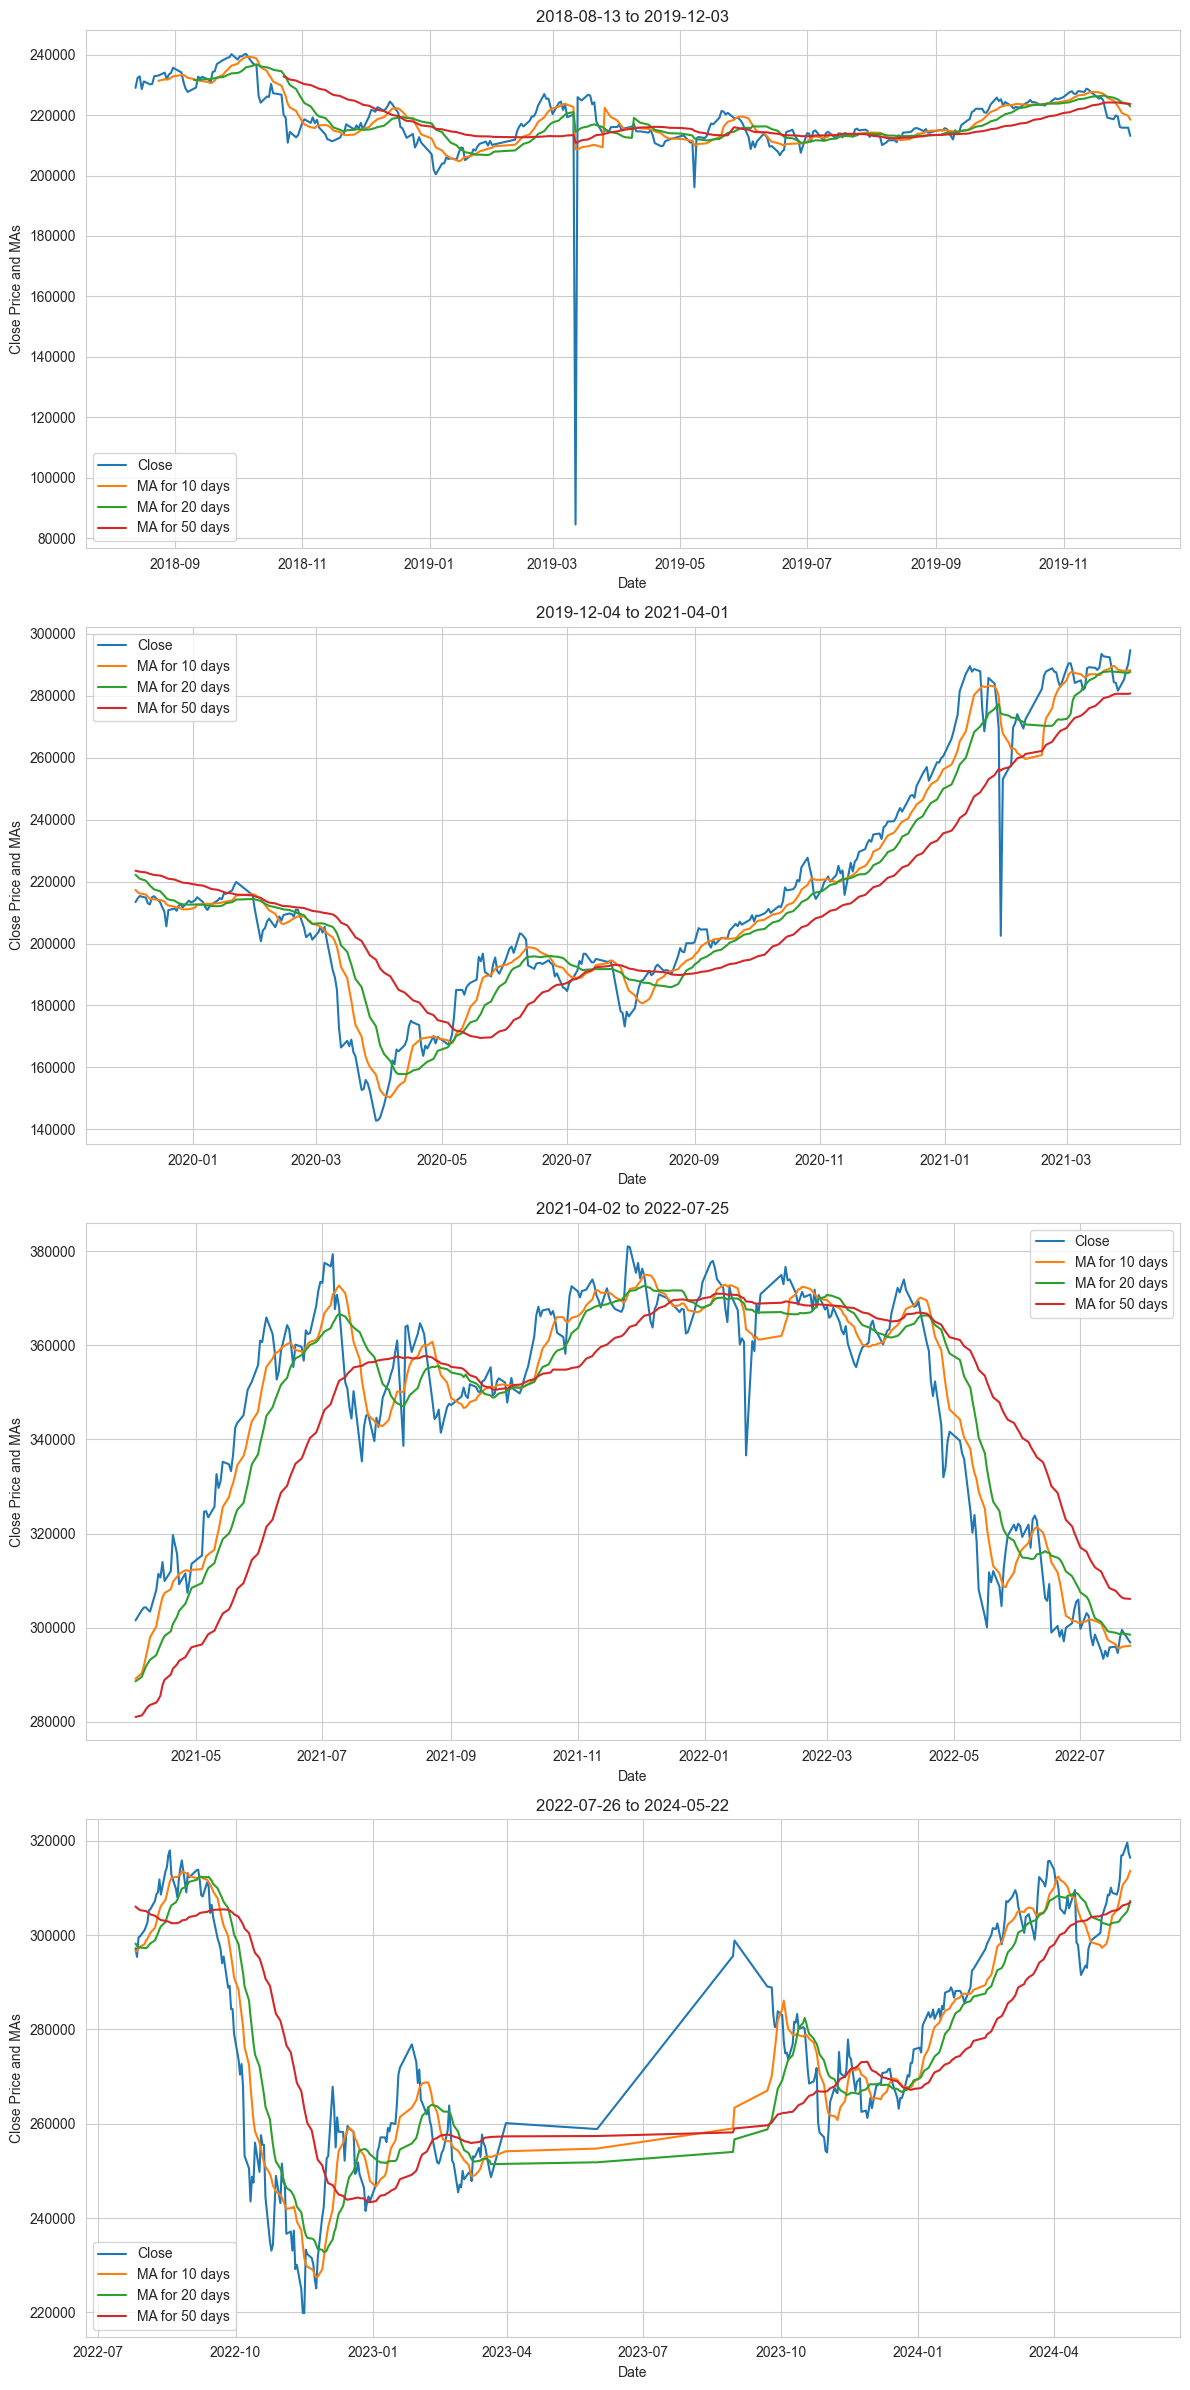

In [16]:
# Nhóm dữ liệu theo ngày và tính tổng cột Close
daily_sum = sub_df['Close'].groupby(sub_df.index.date).sum()

# Chuyển lại thành DataFrame
daily_sum_df = daily_sum.to_frame(name='Close')

# Tính các đường trung bình động
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = f"MA for {ma} days"
    daily_sum_df[column_name] = daily_sum_df['Close'].rolling(window=ma).mean()

# Chọn cột cần thiết để vẽ
plot_columns = ['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']
data_to_plot = daily_sum_df[plot_columns]

# Chia dữ liệu thành 4 phần bằng nhau
n = len(data_to_plot)
step = n // 4
parts = [data_to_plot.iloc[i:i + step] for i in range(0, n, step)]

# Tạo các subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 24))

for i, part in enumerate(parts):
    if i < len(axs):  # Kiểm tra xem chỉ vẽ đồ thị nếu vẫn còn subplot
        part.plot(ax=axs[i], legend=True)
        start_date = part.index[0].strftime('%Y-%m-%d')
        end_date = part.index[-1].strftime('%Y-%m-%d')
        axs[i].set_title(f'{start_date} to {end_date}')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('Close Price and MAs')

# Điều chỉnh layout để đồ thị không bị chèn lấn
plt.tight_layout()
plt.show()

Biểu đồ từ 2018-08-13 đến 2019-12-03:

Diễn biến giá đóng cửa và các đường trung bình động:
Đường giá đóng cửa (Close) có xu hướng dao động trong khoảng từ 200,000 đến 240,000.
Các đường trung bình động (Moving Averages) cho 10 ngày, 20 ngày, và 50 ngày cho thấy xu hướng chung của giá:
Đường MA 10 ngày (màu cam) phản ánh biến động giá ngắn hạn và thường xuyên bám sát đường giá đóng cửa.
Đường MA 20 ngày (màu xanh lá) biểu thị xu hướng trung hạn và ít biến động hơn so với đường MA 10 ngày.
Đường MA 50 ngày (màu đỏ) phản ánh xu hướng dài hạn, ít thay đổi và có xu hướng mượt hơn.
Có một số đợt giảm giá đáng chú ý, đặc biệt là vào khoảng đầu năm 2019, khi giá giảm mạnh nhưng nhanh chóng hồi phục.
Biểu đồ từ 2019-12-04 đến 2021-04-01:

Diễn biến giá đóng cửa và các đường trung bình động:
Giá đóng cửa bắt đầu khoảng 220,000 và tăng lên gần 300,000 vào cuối giai đoạn.
Đường MA 10 ngày, 20 ngày, và 50 ngày đều thể hiện xu hướng tăng trong dài hạn.
Biểu đồ này cho thấy một xu hướng tăng mạnh mẽ từ giữa năm 2020 đến đầu năm 2021, có thể phản ánh sự phục hồi sau giai đoạn giảm giá trước đó.
Biểu đồ từ 2021-04-02 đến 2022-07-25:

Diễn biến giá đóng cửa và các đường trung bình động:
Giá đóng cửa có xu hướng dao động mạnh hơn trong khoảng từ 280,000 đến 380,000.
Đường MA 10 ngày và 20 ngày thường xuyên cắt nhau, cho thấy sự biến động mạnh trong ngắn hạn và trung hạn.
Đường MA 50 ngày cho thấy xu hướng chung, ít biến động hơn nhưng vẫn theo xu hướng tăng rồi giảm.
Biểu đồ từ 2022-07-26 đến 2024-05-22:

Diễn biến giá đóng cửa và các đường trung bình động:
Giá đóng cửa bắt đầu khoảng 220,000 và tăng lên trên 300,000 vào cuối giai đoạn.
Đường MA 10 ngày và 20 ngày có nhiều lần cắt nhau, phản ánh sự biến động giá ngắn hạn và trung hạn.
Đường MA 50 ngày phản ánh xu hướng tăng dài hạn từ giữa năm 2023 đến đầu năm 2024.
Nhận xét tổng quan:

Các biểu đồ cho thấy sự biến động giá chứng khoán phái sinh VN30 qua các giai đoạn khác nhau, với nhiều đợt tăng giảm mạnh.
Các đường trung bình động giúp làm mượt các biến động ngắn hạn và cho thấy xu hướng chung của giá trong các khoảng thời gian khác nhau.
Các đợt tăng giảm giá có thể phản ánh các sự kiện kinh tế, chính trị hoặc các thay đổi quan trọng trên thị trường.


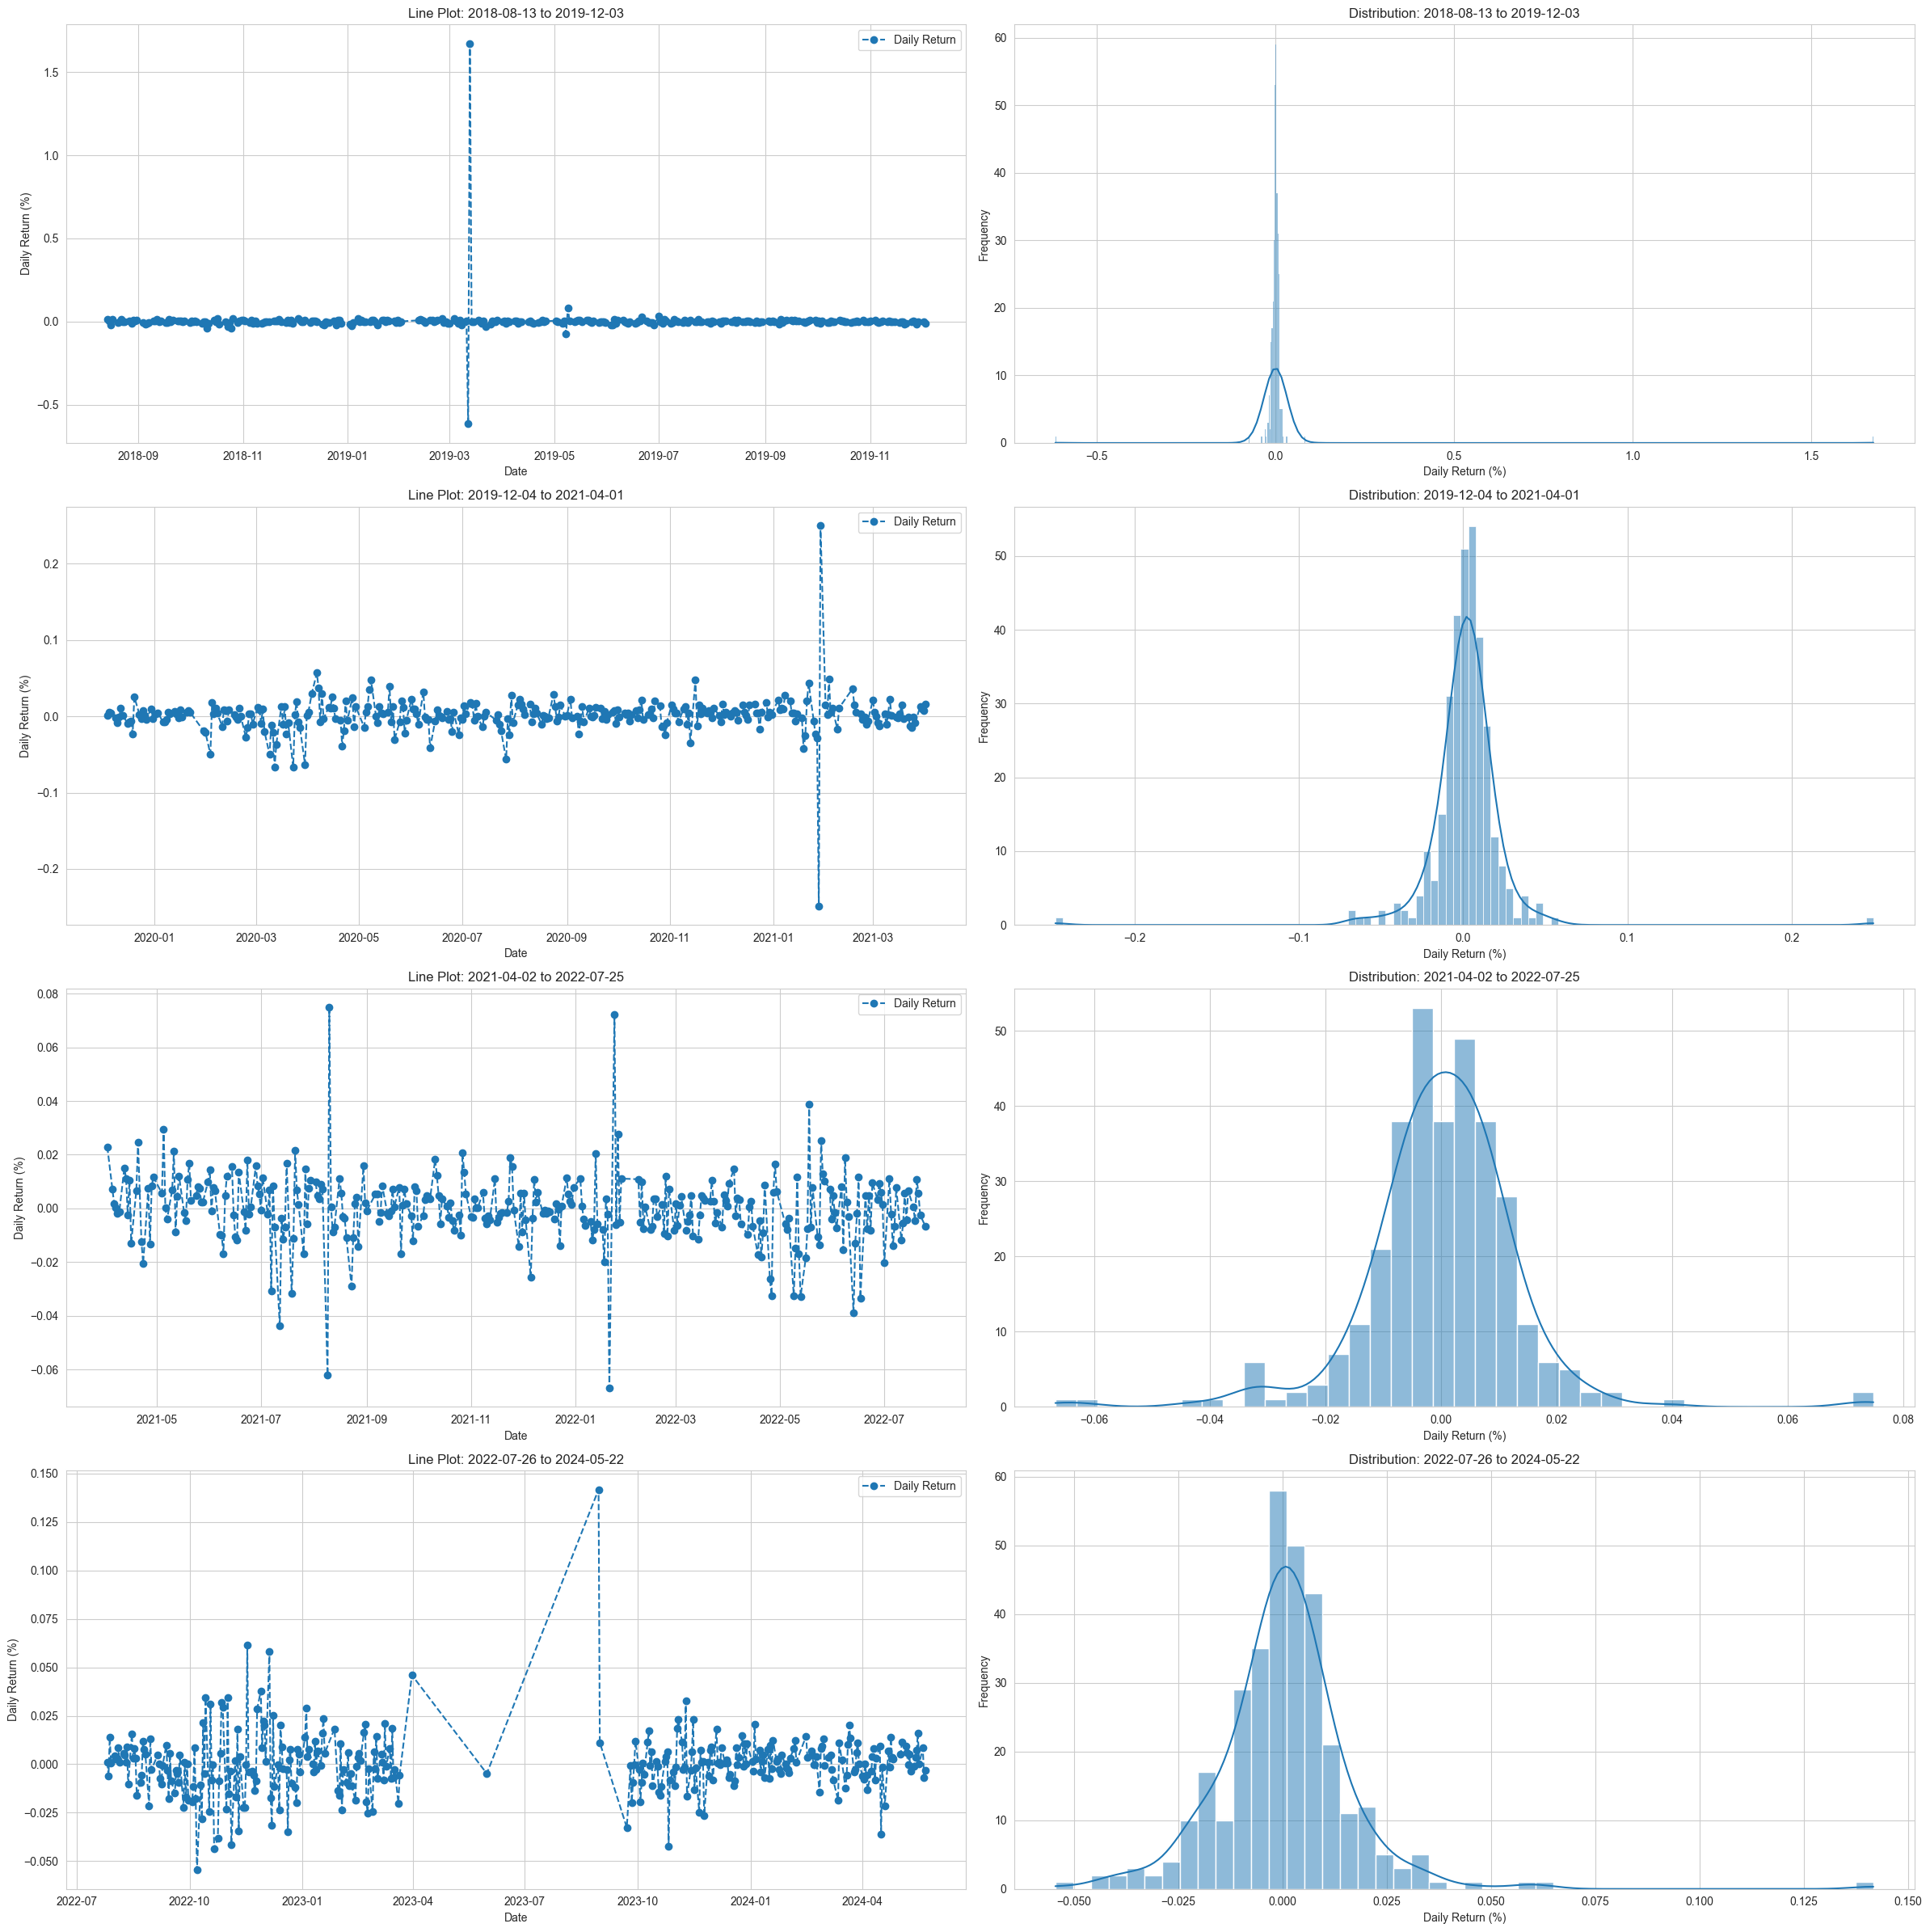

In [17]:
# Tính phần trăm thay đổi hàng ngày
daily_sum_df['Daily Return'] = daily_sum_df['Close'].pct_change()

# Chia dữ liệu thành 4 phần bằng nhau
n = len(daily_sum_df)
step = n // 4
parts = [daily_sum_df.iloc[i:i + step] for i in range(0, n, step)]

# Tạo các subplots cho kết hợp hai loại biểu đồ
fig, axs = plt.subplots(4, 2, figsize=(24, 24))

# Vẽ đồ thị cho mỗi phần
for i, part in enumerate(parts):
    if i < len(axs):  # Kiểm tra xem chỉ vẽ đồ thị nếu vẫn còn subplot
        # Plot daily return line plot
        part['Daily Return'].plot(ax=axs[i, 0], legend=True, linestyle='--', marker='o')
        start_date = part.index[0].strftime('%Y-%m-%d')
        end_date = part.index[-1].strftime('%Y-%m-%d')
        axs[i, 0].set_title(f'Line Plot: {start_date} to {end_date}')
        axs[i, 0].set_xlabel('Date')
        axs[i, 0].set_ylabel('Daily Return (%)')
        
        # Plot daily return distribution
        sns.histplot(part['Daily Return'].dropna(), kde=True, ax=axs[i, 1])
        axs[i, 1].set_title(f'Distribution: {start_date} to {end_date}')
        axs[i, 1].set_xlabel('Daily Return (%)')
        axs[i, 1].set_ylabel('Frequency')

# Điều chỉnh layout để đồ thị không bị chèn lấn
plt.tight_layout()
plt.show()

Giai đoạn từ 2018-08-13 đến 2019-12-03 cho thấy thị trường ổn định với một số đỉnh nổi bật. Sự tự tương quan thấp của lợi tức hàng ngày làm cho việc dự đoán trở nên khó khăn. Tuy nhiên, các sự kiện cực đoan đã xảy ra, nhấn mạnh tầm quan trọng của việc quản lý rủi ro hiệu quả.
- Phân bố tỷ suất lợi nhuận chủ yếu tập trung ở mức 0%, với một vài giá trị ngoại lai lớn.
- Điều này phản ánh rằng lợi tức hàng ngày thường có tự tương quan thấp (low autocorrelation), tức là khả năng dự đoán lợi tức dựa trên quá khứ là hạn chế.

Giai đoạn từ 2019-12-04 đến 2021-04-01 cho thấy sự ổn định tiếp tục của thị trường, nhưng với sự bất ổn tăng cao do đại dịch COVID-19. Thị trường dần hồi phục nhưng vẫn còn những biến động nhỏ do các đợt bùng phát COVID-19 mới và các biện pháp kinh tế kích thích.
- Phân bố tỷ suất lợi nhuận tập trung nhiều ở mức 0%, nhưng có nhiều biến động hơn so với giai đoạn trước.
- Giai đoạn này bao gồm đợt bùng phát COVID-19, ảnh hưởng mạnh đến thị trường toàn cầu.

Giai đoạn từ 2021-04-02 đến 2022-07-25 cho thấy sự biến động tăng cao, có thể do sự phục hồi kinh tế sau đại dịch COVID-19. Thị trường dần hồi phục nhưng vẫn còn những biến động nhỏ do các đợt bùng phát COVID-19 mới và các biện pháp kinh tế kích thích.
- Tỷ suất lợi nhuận hàng ngày trong giai đoạn này cho thấy sự biến động đều, không có sự kiện đột ngột như các giai đoạn trước.
- Điều này cho thấy thị trường bắt đầu có dấu hiệu phục hồi và ổn định trở lại.

Giai đoạn từ 2022-07-26 đến 2024-05-22 cho thấy sự biến động cao nhất, phản ánh sự nhạy cảm của thị trường đối với cả sự kiện trong nước và quốc tế. Các yếu tố như căng thẳng địa chính trị, sự không chắc chắn của kinh tế toàn cầu và các thay đổi chính sách lớn ở Việt Nam đã tác động đến môi trường kinh doanh và đầu tư, gây ra những phản ứng mạnh mẽ trên thị trường.
- Phân bố tỷ suất lợi nhuận có sự lan tỏa rộng hơn, với nhiều giá trị ngoại lai.
- Tỷ suất lợi nhuận hàng ngày trong giai đoạn này có sự biến động nhiều, đặc biệt vào đầu năm 2023.

Text(50, 50, 'VN30F1M')

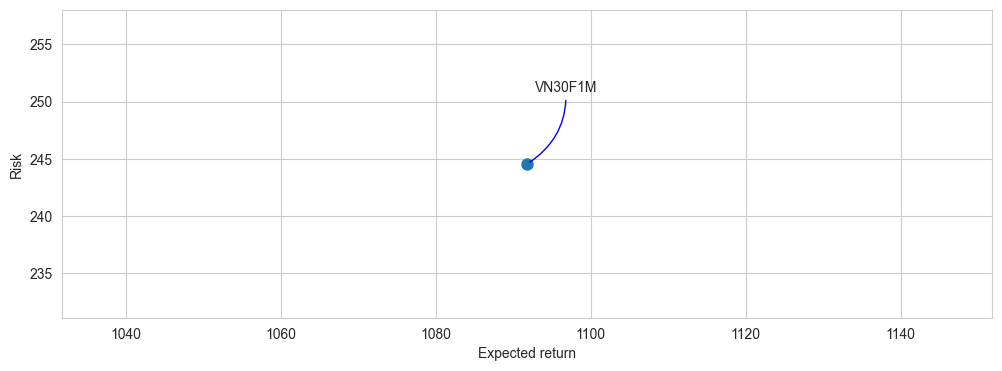

In [23]:
rets = sub_df["Close"].dropna()

area = np.pi * 20

plt.figure(figsize=(12, 4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

plt.annotate('VN30F1M', xy=(rets.mean(), rets.std()), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
            arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


Tỷ suất lợi nhuận kỳ vọng: 1100
Rủi ro (độ lệch chuẩn): 245
--> Lợi nhuận kỳ vọng cao nhưng rủi ro cũng cao
--> Cần thêm mô hình để giảm rủi ro hơn

*Nhà đầu tư A*:
Đầu tư vào VN30F1M:
Mua 100 cổ phiếu VN30F1M.
Lợi nhuận kỳ vọng: 100 * 1100 = 110,000.
Rủi ro kỳ vọng (độ lệch chuẩn tổng hợp): 100 * 245 = 24,500.
Kế hoạch đa dạng hóa: Đầu tư thêm vào trái phiếu hoặc quỹ đầu tư an toàn với lợi nhuận thấp nhưng ít rủi ro để cân bằng danh mục.

*Nhà đầu tư B*:
Không đầu tư vào VN30F1M:
Tìm kiếm cổ phiếu khác có tỷ suất lợi nhuận kỳ vọng là 500 nhưng rủi ro chỉ là 100.
Đầu tư vào cổ phiếu này và một phần vào trái phiếu.
Mua 100 cổ phiếu mới:
Lợi nhuận kỳ vọng: 100 * 500 = 50,000.
Rủi ro kỳ vọng: 100 * 100 = 10,000.